# Evaluating and Tuning a Binary Classification Model

## Goals

After this lesson, you should be able to:

- Discussion of OneHotEncoder vs get_dummies
- Build and explain confusion matrices from a model output
- Calculate various binary classification metrics
- Explain the AUC/ROC curve, why it matters, and how to use it
- Understand when and how to optimize a model for various metrics
- Optimize a classification model based on costs

Category definitions - possible outcomes in binary classification

- TP = True Positive (class 1 correctly classified as class 1) - e.g. Patient with cancer tests positive for cancer
- TN = True Negative (class 0 correctly classified as class 0) - e.g. Patient without cancer tests negative for cancer
- FP = False Positive (class 0 incorrectly classified as class 1) - e.g. Patient without cancer tests positive for cancer
- FN = False Negative (class 1 incorrectly classified as class 0) - e.g. Patient with cancer tests negative for cancer

 $$ \text{Possible misclassifications} $$

![Type 1 vs. Type 2 Error](images/type-1-type-2.jpg)

 All the Binary Classification Metrics

<img src='./images/conf_matrix_classification_metrics.png' width=700/>


[Visualization of harmonic means](https://medium.com/swlh/visualizing-the-geometric-and-harmonic-means-e8b9c5a818ae)

## Let's run a model and look at some metrics 

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

[Dataset info](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [57]:
df = pd.read_csv('./data/heart.csv')

In [58]:
df.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [59]:
df['target'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

[sklearn - Why do we need Train-Test-Validation?](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [60]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 77, 
                                                    stratify = y, 
                                                    test_size = .2)

In [6]:
## Let's check number of 1 and 0 in both datasets
y_train.mean(), y_test.mean()

(0.5454545454545454, 0.5409836065573771)

__Your Turn__

- Write a function that finds the categorical variables.


In [82]:
# %load -r 1-7 supplement.py

In [61]:
categorical_variables

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [83]:
remaining_list = [i for i in df.columns.tolist() if i not in categorical_variables]
remaining_list.remove('target')

## double check the categorical variables from data_information
remaining_list

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

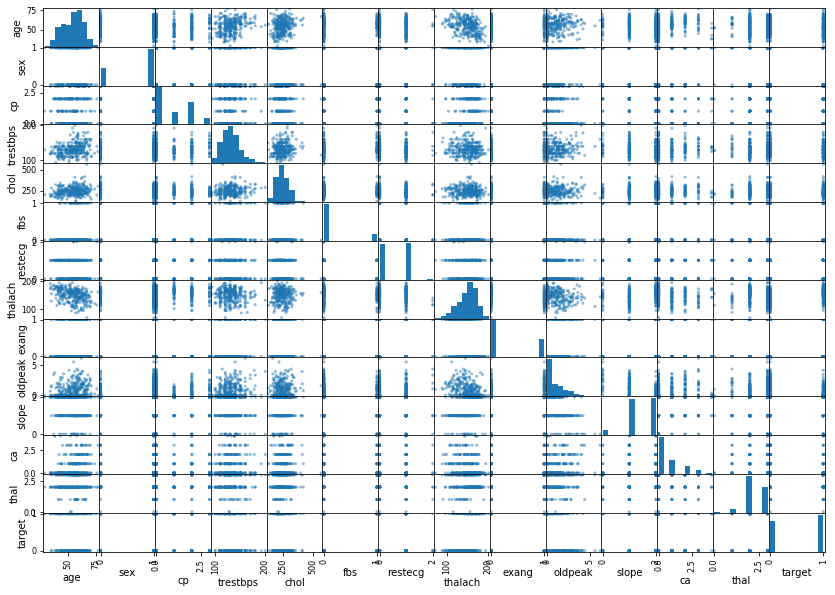

In [62]:
# we can also check the categorical variables with scatter matrix plot
# but notice that this is not practical in higher dimensions
pd.plotting.scatter_matrix(df, figsize= (14, 10))
plt.show()

__Your Turn__

- Convert Categorical Variables to OneHotEncoding

- [Dummies vs OneHot: Read the second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

In [ ]:
# %load -r 9-15 supplement.py


__Don't forget!!__

- Apply the same transformations to the test data.

In [87]:
X_num = X_test[remaining_list].values

X_Cat = enc.transform(X_test[categorical_variables]).toarray()
X_test = np.concatenate((X_num, X_Cat), axis = 1)

__Scaling Features__

In [ ]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

## apply the trained transformations to test.

X_test = standard_scaler.transform(X_test)

In [ ]:
np.mean(X,axis = 0)

## What do you expect if you check the means of X_test? Try

[Check sklearn for documentation of Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


[For solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [90]:
# %load -r 17-18 supplement.py

In [69]:
## What is this score?
print(lr.score(X, y_train))

0.8966942148760331


__Your Turn__

- Fit a logistic regression with C = 1 and $\ell_2$ regularization.

- Fit a logistic regression with C = 1 and $\ell_1$ regularization.

- Use 5-fold cross-validation with sklearn cross_validate

[sklearn -  cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

[sklearn - cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [91]:
# %load -r 20-52 supplement.py

In [30]:
## let's see train and validation scores
vanilla_result = np.concatenate((cv_vanilla['train_score'].reshape(-1,1), 
                cv_vanilla['test_score'].reshape(-1,1)), axis=1)

l2_result = np.concatenate((cv_l2['train_score'].reshape(-1,1), 
                cv_l2['test_score'].reshape(-1,1)), axis=1)

l1_result = np.concatenate((cv_l1['train_score'].reshape(-1,1), 
                cv_l1['test_score'].reshape(-1,1)), axis=1)

In [31]:
vanilla_result;

In [32]:
l2_result;

In [92]:
l1_result;

In [33]:
print(vanilla_result.mean(axis=0), l1_result.mean(axis=0), l2_result.mean(axis=0))

[0.89251108 0.82219388] [0.73862507 0.72312925] [0.88841408 0.86743197]


In [34]:
lr = cv_l2['estimator'][0]

### The Default Measure (in most prebuilt models) - Accuracy

$$ \frac{(TP + TN)}{(TP + FP + TN + FN)} $$

<img src='./images/conf_matrix_classification_metrics.png' width=600/>

- We got an accuracy score of .82, but what does that tell us? Just that 82% of the time we are correct, nothing about how we are correct or how we are wrong

In [35]:
predictions = lr.predict(X)
actual = y_train

In [36]:
confusion_matrix(actual, predictions)

array([[ 95,  15],
       [ 12, 120]])

__My eyes!!!__

In [37]:
pd.DataFrame(confusion_matrix(actual, predictions), 
             columns = ['predicted 0', 'predicted 1'], 
             index = ['actual 0', 'actual 1'])

predicted 0  predicted 1
actual 0           95           15
actual 1           12          120

- We got more false positives than false negatives. What would we likely prefer in the case of this dataset?

## Other metrics

__Misclassification Rate__

 $$ 1 - \text{accuracy} $$ 

 $$ \text{OR} $$

 $$ \frac{FP + FN}{TP + FP + TN + FN} $$

__Sensitivity__ (AKA True Positive Rate, Recall, and Probability of Detection)

$$ \frac{TP}{TP + FN} $$

__Specificity__ (AKA True Negative Rate)

$$ \frac{TN}{TN + FP} $$

__Your Turn__

- Write functions that returns the Recall, Precision and $F_1$ score.

- Which of these metrics would we want to optimize for in a heart disease detection algorithm?

False Positives and False Negatives each have some cost associated with them.

__Write Your Own Cost Function__

In [93]:
def your_metric(confusion_matrix):
    TP = confusion_matrix[0,0]
    TN = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    return 0*TN + 5*FP 

your_metric(confusion_matrix(actual, predictions))

75

### Let's figure out how to optimize!

Remember that Logistic Regression gives probability predictions for each class, in addition to the final classification. By default, threshold for the prediction is set to 0.5, but we can adjust that threshold.

In [38]:
predicts = []
for item in lr.predict_proba(X):
    if item[0] <= .20:
        predicts.append(1)
    else:
        predicts.append(0)

In [39]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, predicts),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
conf_matrix

predicted 0  predicted 1
actual 0           79           31
actual 1            6          126

In [ ]:
def FPR(confusion_matrix):
    TN = confusion_matrix[0,0]
    TP = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    return FP/(FP + TN)

def TPR(confusion_matrix):
    TN = confusion_matrix[0,0]
    TP = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    return TP/(TP + FN)
fprs = []
tprs = []
for threshold in np.linspace(0,1,100):
    predicts = []
    for item in lr.predict_proba(X):
        if item[1] <= threshold:
            predicts.append(0)
        else:
            predicts.append(1)
    c = confusion_matrix(y_train, predicts)
    fprs.append(FPR(c))
    tprs.append(TPR(c))
    
plt.plot(fprs[1:], tprs[1:])

### The AUC / ROC curve (Area Under Curve of the Receiver Operating Characteristic)

<img src='images/pop-curve.png' width=500/>


In [41]:
results_df = X_train.copy()

In [42]:
results_df['probabilities'] = lr.predict_proba(X)[:, 0]
results_df['target'] = y_train

In [72]:
results_df.head(2)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
121   59    1   0       138   271    0        0      182      0      0.0   
153   66    0   2       146   278    0        0      152      0      0.0   

     slope  ca  thal  probabilities  target  
121      2   0     2       0.216399       1  
153      1   1     2       0.290931       1

In [43]:
import seaborn as sns

In [44]:
sns.distplot(results_df[results_df.target == 1].probabilities)
sns.distplot(results_df[results_df.target == 0].probabilities)
plt.axvline(x = 0.2, linestyle = '--', c = 'black')
plt.xlim([0,1])
plt.show()

In [45]:
import matplotlib.pyplot as plt

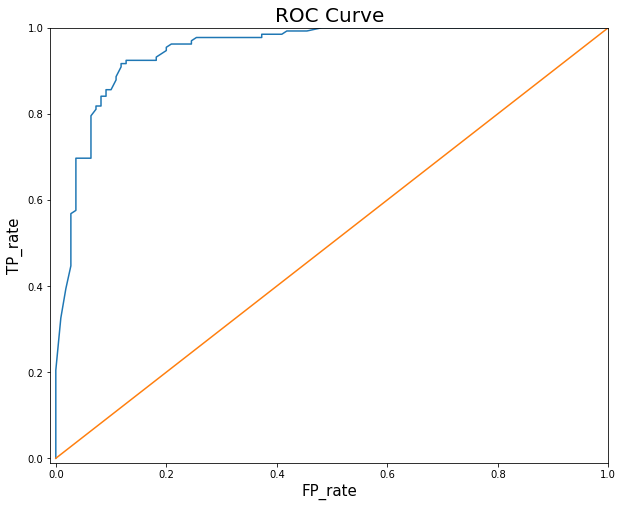

In [73]:
x_list = []
y_list = []

for x in np.linspace(0, 1, 100):
    
    # Same predictions based on predict_proba thresholds
    predicts = []
    
    for item in lr.predict_proba(X):
        if item[0] <= x:
            predicts.append(1)
        else:
            predicts.append(0)

    conf_matrix = pd.DataFrame(confusion_matrix(y_train, predicts), index = ['actual 0', 'actual 1'], 
                     columns = ['predicted 0', 'predicted 1'])
    
    
    # Assign TP, TN, FP, FN
    true_positives = conf_matrix['predicted 1'][1]
    true_negatives = conf_matrix['predicted 0'][0]
    false_positives = conf_matrix['predicted 1'][0]
    false_negatives = conf_matrix['predicted 0'][1]

    
    # Calculate Sensitivity and Specificity
    sensitivity = true_positives / (true_positives + false_negatives)

    specificity = true_negatives / (true_negatives + false_positives)
    
    
    # Append to lists to graph
    x_list.append(1 - specificity)

    y_list.append(sensitivity)

    
# Plot ROC curve

plt.figure(figsize = (10, 8))
plt.title('ROC Curve', fontsize = 20)
plt.xlabel('FP_rate', fontsize = 15)
plt.ylabel('TP_rate', fontsize = 15)
plt.xlim(-0.01, 1)
plt.ylim(-0.01, 1)
plt.plot(x_list, y_list);
plt.plot([0, 1], [0, 1]);

# x = 1 - specificity
# y = sensitivity

In [74]:
from sklearn.metrics import auc

In [75]:
auc(x_list, y_list)

0.950034435261708

# Play Ground

### Let's add associated costs to our False Negatives and False Positives to our loop and minimize the cost
This is the naive way to optimize, but works well - you could also create a closed form optimization function

In [76]:
def my_eyes_cost_much(num_thres = 100, p_fp = 3, p_tn = 0.5, p_tp = 1, p_fn = 2):

    _thres = []; tpr = [] ; fpr = [] ; cost = []

    prediction = lr.predict_proba(X)

    ## Different code for same objective to calculate metrics at thresholds
    
    for thres in np.linspace(0.01, 1, num_thres):
        
        _thres.append(thres)
        predicts = np.zeros((prediction.shape[0], 1)) 
        predicts[np.where(prediction[:, 1] >= thres)] = 1

        conf_matrix = confusion_matrix(y_train, predicts)

        tp = conf_matrix[1, 1]
        tn = conf_matrix[0, 0]
        fp = conf_matrix[0, 1]
        fn = conf_matrix[1, 0]

        sensitivity = tp / (tp + fn)
        tnr = specificity = tn / (tn + fp)
        fnr = 1 - sensitivity

        tpr.append(sensitivity)
    
        fpr.append(1 - specificity)
        
        # add a cost function (this involves domain knowledge)
        
        current_cost = (p_fp * fp) + (p_tn * tn) + (p_tp * tp) + (p_fn * fn)
            
        cost.append(current_cost)  

    return fpr, tpr, cost, _thres

In [77]:
fpr, tpr, cost, thres = my_eyes_cost_much(num_thres = 100, p_fp = 3, p_tn = 0.5, p_tp = 1, p_fn = 2)

In [78]:
cost_idx = np.argmin(cost)
min_cost_threshold = fpr[cost_idx], tpr[cost_idx], thres[cost_idx]

print(min_cost_threshold)

(0.09090909090909094, 0.8560606060606061, 0.5800000000000001)


Text(0.15090909090909094, 0.826060606060606, 'Threshold:0.58')

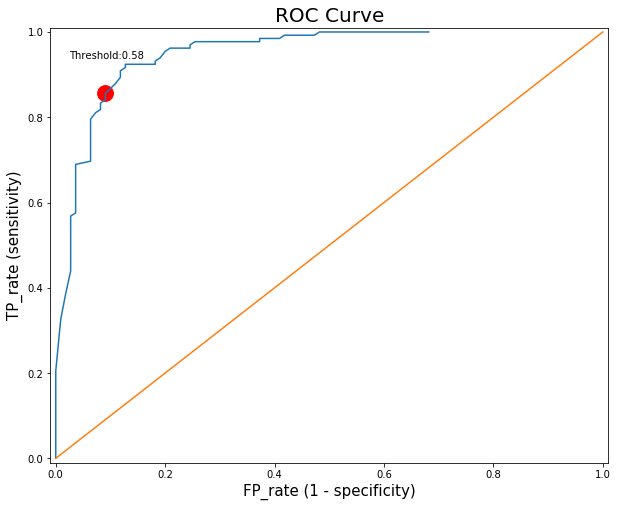

In [79]:
ax = plt.figure(figsize = (10, 8))
plt.title('ROC Curve', fontsize = 20)
plt.xlabel('FP_rate (1 - specificity)', fontsize = 15)
plt.ylabel('TP_rate (sensitivity)', fontsize = 15)
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)
plt.plot(fpr, tpr);
plt.plot([0, 1], [0, 1]);
plt.scatter(min_cost_threshold[0], min_cost_threshold[1], marker ='o', color = 'red', s=250)
ax.text(min_cost_threshold[0] + 0.06, min_cost_threshold[1] - 0.03, 'Threshold:'+ str(round(min_cost_threshold[2], 2)))
